# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 1. 분석의 목적과 변수 확인
- Survived : survived
- Pclass : Ticket Class
- Sex : Sex
- Age : Age in years -> float
- SibSp : sibling/spouses
- Parch : parents/children
- Ticket : ticekt number
- Fare : passenger fare
- Cabin : cabin num
- Embarked : port : (C, Q, S)

## 2. 데이터 전체적으로 살펴보기

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
print(f'NULL: \n{df.isnull().sum()}')

NULL: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## 3. 데이터의 개별 속성 파악하기

0    549
1    342
Name: Survived, dtype: int64


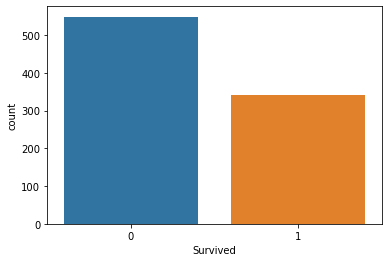

In [7]:
#생존자 사망자 카운트
import seaborn as sns
import matplotlib.pyplot as plt
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df)
plt.show()

In [8]:
#pclass 별 survived
print(df[['Survived', 'Pclass']].groupby('Pclass').sum())
print(df[['Survived', 'Pclass']].groupby('Pclass').mean())

        Survived
Pclass          
1            136
2             87
3            119
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [9]:
#sex 별 survived
print(df[['Survived', 'Sex']].groupby('Sex').mean())
df.groupby(['Survived', 'Sex'])['Survived'].count()

        Survived
Sex             
female  0.742038
male    0.188908


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

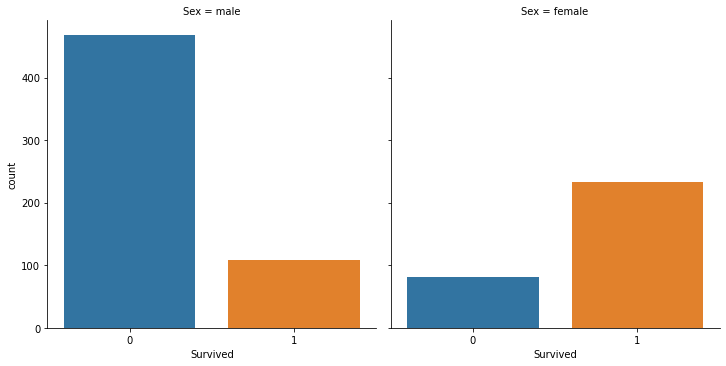

In [10]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df)

In [11]:
#age 별 survived

df[['Survived', 'Age']].groupby('Age').count()

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


<AxesSubplot:xlabel='Age', ylabel='Density'>

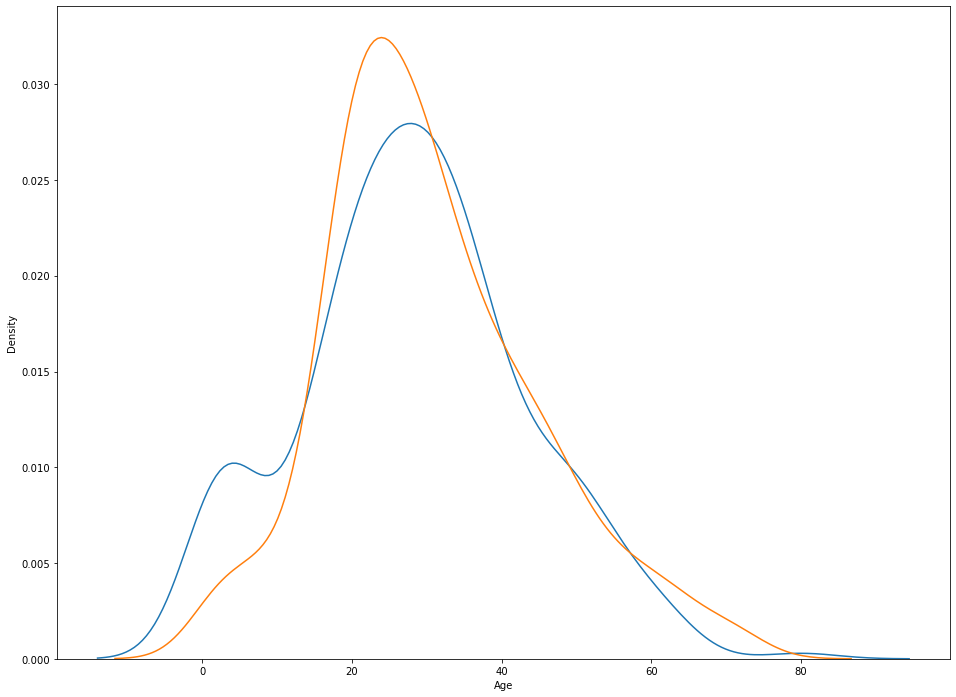

In [12]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1,1,1)
sns.kdeplot(df[df['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived']==0]['Age'], ax=ax)

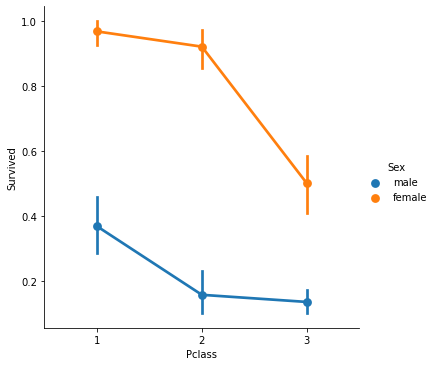

In [13]:
sns.catplot(x='Pclass', y='Survived', hue='Sex',kind='point', data=df)

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [14]:
cols = df.columns
print(cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Pclass와 Fare, Survived의 비교
1. Plcass, Fare

값을 크게 치르지 않고도 Pclass가 높은 경우가 있다. 고위층의 특혜였을까.
그리고 매우 큰 값을 치르고 first class에 탑승한 사람도 있다. 어떤 이유에서 바가지에 씌인걸까.

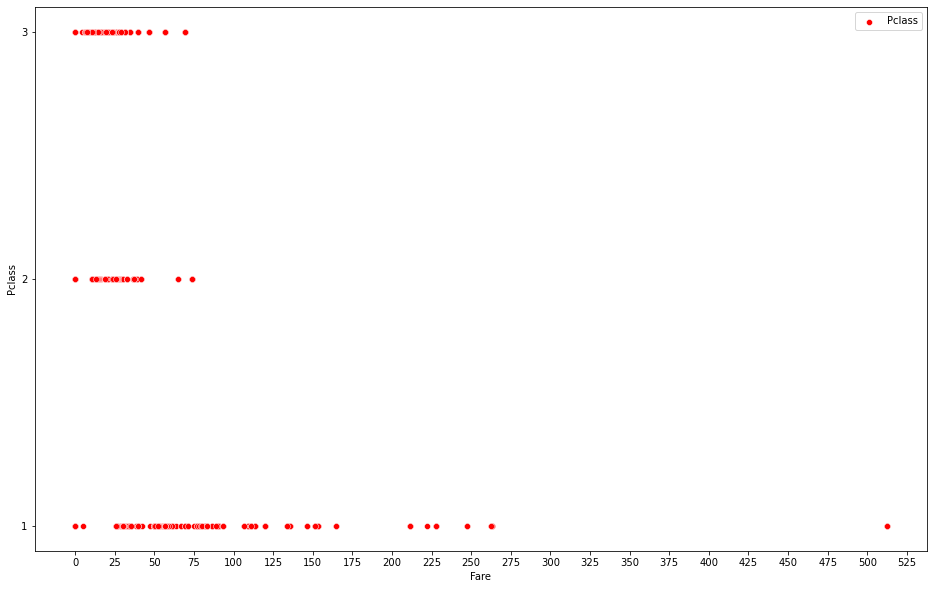

In [15]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x='Fare', y='Pclass', data=df, ax=ax, color='red')
ax.set_yticks([1,2,3])
ax.set_xticks(np.arange(0,526, 25))
ax.legend(['Pclass'])
plt.show()

* Fare과 Survived의 관계는?
두 변수의 상관계수를 보면 유의미한 직선관계가 관찰되지 않음을 알 수 있다.


In [16]:
df[['Fare', 'Survived']].corr()


,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


2. SibSp와 Survived의 관계

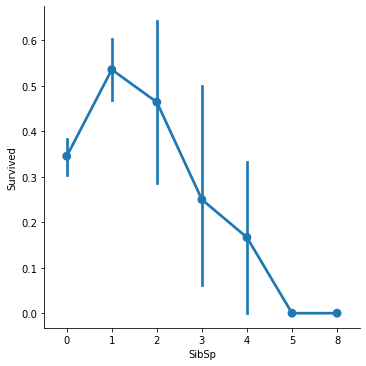

In [17]:
sns.catplot(x='SibSp', y='Survived',kind='point', data=df)
plt.show()


챙길 가족이 많을 수록 살아남기 어려웠을 것으로 예측할 수 있으며
거꾸로 가족 중 보호자가 많을 수록 살아남기 쉬웠을 것이라 예측할 수 있다.
위의 그래프는 형제와 배우자를 구분하지 않고 SubSp 와 Survived의 관계를 나타낸 것이다.
이를 통해 1명이 보호자/자식이 있을 경우가 가장 많은 비율로 살아남았으며,
그 이상이 될수록 급격히 생존률이 감소함을 알 수 있는데, 챙길 가족이 많을 수록 살아남기 어려우리라는 가설에 힘을 실어주며
1명인 경우가 0명인 경우보다 생존률이 높은 것은 관계인이 1명일 때는
**그 쌍이 나이대가 비슷하여 서로 도울 수 있는 경우**라고 가정할 수 있다.

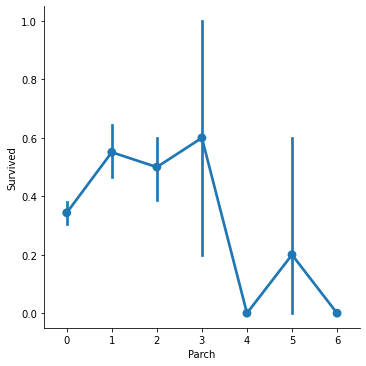

       Survived
Parch          
0           678
1           118
2            80
3             5
4             4
5             5
6             1


In [18]:
sns.catplot(x='Parch', y='Survived',kind='point', data=df)
plt.show()
print(df[['Parch','Survived']].groupby('Parch').count())

위는 부모와 자식을 구분하지 않고 Parch와 Survived의 관계를 나타낸 그래프이다.
생존률은 Parch가 3인 경우 가장 높지만 신뢰구간의 크기가 매우 큼을 알 수 있다.
즉, 매우 적은 표본이 있는 것이다. Parch가 0에서 2까지일 때 경우가 신뢰할 만 하다고 보인다.
이 경우도 1명의 부모/자녀가 있는 경우가 제일 생존률이 상대적으로 높았다.
이 때 Parch를 보호자와 자식으로 구분할 필요가 있다. 만약 자식이 많다면 본인의 생존률은 떨어지리라 예상할 수 있지만
보호자가 많다면 본인의 생존률은 다소 상승하리라 가정할 수 있다.

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


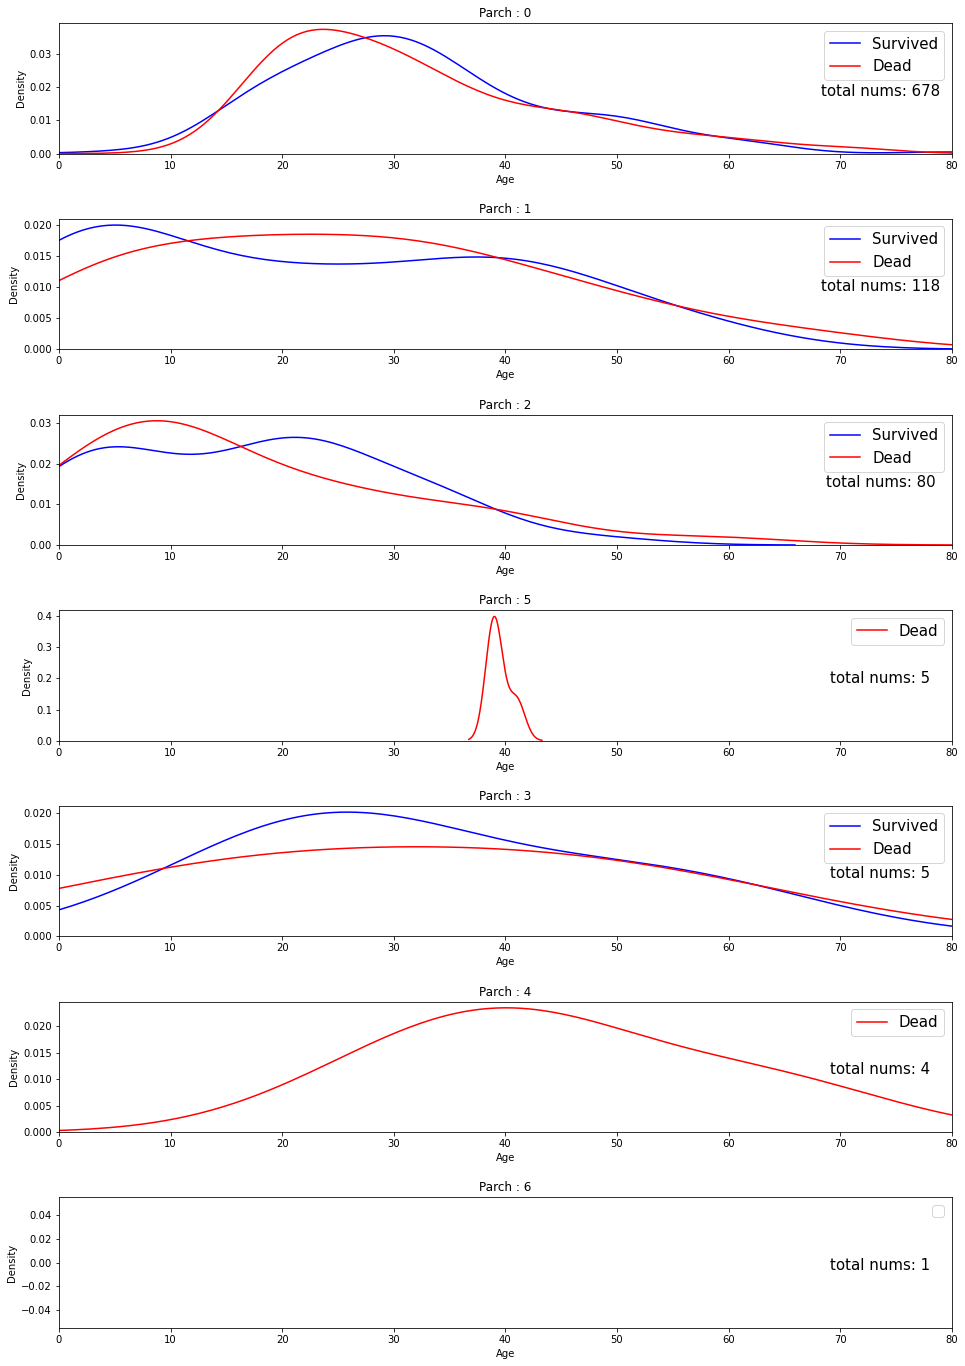

In [19]:
parch = df['Parch'].unique()
l = df['Parch'].nunique()
fig = plt.figure(figsize=(16,24))
plt.subplots_adjust(hspace=0.5)
for i,v in enumerate(parch):
    ax = fig.add_subplot(l, 1, i+1)
    ax.text(0.92,0.48, f'total nums: {(df["Parch"]==v).sum()}',
            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
            fontsize=15)
    sns.kdeplot(df[(df['Survived']==1) & (df['Parch']==v)]['Age'], ax=ax, color='b',
                label='Survived')
    sns.kdeplot(df[(df['Survived']==0) & (df['Parch']==v)]['Age'], ax=ax, color='r',
                label='Dead')
    ax.set_xlim(0,80)
    ax.legend(fontsize=15)
    ax.set_title(f'Parch : {v}')
plt.show()

In [20]:
df['gen'] = df['Age'].apply(lambda x: 10*int(x/10) if str(x)!='nan' else None)

Parch가 0인 경우 20대 초반에서 사망률이 생존률에 비해 다소 높은 것을 확인할 수 있다.
이는 단순 연령과 생존률을 비교한 그래프에서 나타내는 경향과 유사하다.

In [21]:
df[(df['Parch']==1) & (df['Age'] < 10)]['Survived'].sum()

23

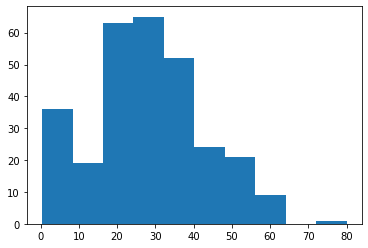

In [22]:
plt.hist(df[df['Survived']==1]['Age'])
plt.show()

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

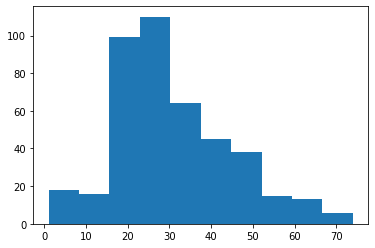

In [23]:
plt.hist(df[df['Survived']==0]['Age'])

In [29]:
df[(df['Age']<15) & (df['Age']>9.9) & (df['Parch']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gen
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.900,NaN,S,10.0
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.150,NaN,S,10.0
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.000,B96 B98,S,10.0
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,10.0
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.900,NaN,S,10.0
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.000,B96 B98,S,10.0
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.900,NaN,S,10.0


<AxesSubplot:ylabel='Density'>

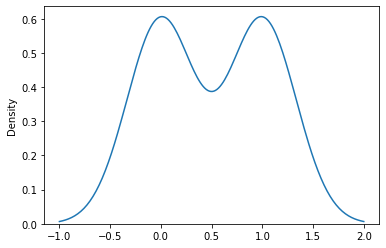

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:
1. 데이터를 톺아봅시다.  
    - 각 데이터는 어떤 자료형을 가지고 있나요?  
    - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?  
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할 수록 좋습니다 ex) *Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!*
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.  
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?
s